### Clustering Data Twitter

Clustering yang dilakukan dengan TF-IDF, K-Means, dan Matplot

### 1. Import Data

In [1]:
import csv
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize

def processing(konten):
    sentences = word_tokenize(konten)
    cleaned_sentence = []
    for s in sentences :
        s = s.strip()  
        
        # Enregistrement des resultats
        cleaned_sentence.append(s)
    return(cleaned_sentence)

train = csv.reader(open("preprocessingCSV.csv", "r"))
hasil_train = []
label = []
review = []
for row in train:
    text = row[0]
    process = processing(text)
    review.append(process)

### 2. Menghitung Term Frequency (TF)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_train = []
for train_text in review:
    train_text = ' '.join(train_text)
    tfidf_train.append(train_text)
    
cv = CountVectorizer()
vec = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vec.fit_transform(tfidf_train)
print(pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names()))

         abah  agam  agama      aksi    aktor2  alat  ale  aman  amelza  amp  \
0    0.000000   0.0    0.0  0.000000  0.083333   0.0  0.0   0.0     0.0  0.0   
1    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
2    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
3    0.000000   0.0    0.0  0.071429  0.000000   0.0  0.0   0.0     0.0  0.0   
4    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
5    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
6    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
7    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
8    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
9    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
10   0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
11   0.000000   0.0    0.0  0.000000  0.

### 3. Inverse Document Frequency (IDF)

In [3]:
vec = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vec.fit_transform(tfidf_train)
print(pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names()))

         abah  agam  agama      aksi    aktor2  alat  ale  aman  amelza  amp  \
0    0.000000   0.0    0.0  0.000000  0.083333   0.0  0.0   0.0     0.0  0.0   
1    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
2    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
3    0.000000   0.0    0.0  0.071429  0.000000   0.0  0.0   0.0     0.0  0.0   
4    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
5    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
6    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
7    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
8    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
9    0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
10   0.000000   0.0    0.0  0.000000  0.000000   0.0  0.0   0.0     0.0  0.0   
11   0.000000   0.0    0.0  0.000000  0.

### 4. Mengelompokkan Menjadi 2 Kategori
<P>MENAMPILKAN KATA YANG PALING SERING MUNCUL</P>

In [4]:
"""KMeans 2 kategori document """
number_of_clusters=2
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)
km.fit

print("Top terms per cluster(2):")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

results = pd.DataFrame()
results['text'] = tfidf_train
results['category'] = km.labels_
print(results)

Top terms per cluster(2):
Cluster 0: papua indonesia saudara morning yg
Cluster 1: kitasatuindonesia papuaadalahindonesia papua pelukpapua kitasemuabersaudara
                                                  text  category
0    harap aktor2 yg peran ricuh papua tindak merek...         0
1                  papua saudara rakyat indonesia maaf         0
2    papuaadalahindonesia pelukpapua kitasemuabersa...         1
3    banser bkn ormas kmrn sore yg reaksioner banse...         1
4    papuaindonesia papuasaudaraku kitapapua kitasa...         1
5    buah tembang yg bagus sembah dr slank papua mo...         0
6    buah tembang yg bagus sembah dr slank papua mo...         0
7    buah tembang yg bagus sembah dr slank papua mo...         0
8    buah tembang yg bagus sembah dr slank papua mo...         0
9    buah tembang yg bagus sembah dr slank papua mo...         0
10   buah tembang yg bagus sembah dr slank papua mo...         0
11   sedih hati lihat berita media papua damai indo...       

### 5. Mengelompokkan Menjadi 3 Kategori

In [5]:
"""KMeans 3 kategori document """
number_of_clusters=3
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)
km.fit

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :3]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

results = pd.DataFrame({
    'text': tfidf_train,
    'category': km.labels_
})
print(results)

Top terms per cluster:
Cluster 0: papua indonesia morning
Cluster 1: papua saudara rakyat
Cluster 2: kitasatuindonesia papua papuaadalahindonesia
                                                  text  category
0    harap aktor2 yg peran ricuh papua tindak merek...         0
1                  papua saudara rakyat indonesia maaf         1
2    papuaadalahindonesia pelukpapua kitasemuabersa...         2
3    banser bkn ormas kmrn sore yg reaksioner banse...         2
4    papuaindonesia papuasaudaraku kitapapua kitasa...         2
5    buah tembang yg bagus sembah dr slank papua mo...         0
6    buah tembang yg bagus sembah dr slank papua mo...         0
7    buah tembang yg bagus sembah dr slank papua mo...         0
8    buah tembang yg bagus sembah dr slank papua mo...         0
9    buah tembang yg bagus sembah dr slank papua mo...         0
10   buah tembang yg bagus sembah dr slank papua mo...         0
11   sedih hati lihat berita media papua damai indo...         2
12   buah

### 6. TF-IDF

In [6]:
vec = TfidfVectorizer(use_idf=True, max_features=2)
matrix = vec.fit_transform(tfidf_train)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
print(df)

     indonesia     papua
0     0.000000  1.000000
1     0.763211  0.646150
2     0.000000  0.000000
3     0.000000  0.000000
4     0.000000  0.000000
5     0.508521  0.861049
6     0.508521  0.861049
7     0.508521  0.861049
8     0.508521  0.861049
9     0.508521  0.861049
10    0.508521  0.861049
11    0.763211  0.646150
12    0.508521  0.861049
13    0.508521  0.861049
14    0.508521  0.861049
15    0.000000  0.000000
16    0.763211  0.646150
17    0.763211  0.646150
18    0.763211  0.646150
19    0.000000  0.000000
20    0.000000  0.000000
21    0.508521  0.861049
22    0.763211  0.646150
23    0.000000  0.000000
24    1.000000  0.000000
25    0.763211  0.646150
26    0.763211  0.646150
27    0.763211  0.646150
28    0.763211  0.646150
29    0.000000  0.000000
..         ...       ...
157   0.000000  1.000000
158   0.000000  1.000000
159   0.000000  0.000000
160   0.508521  0.861049
161   0.508521  0.861049
162   0.763211  0.646150
163   0.000000  1.000000
164   0.000000  1.000000


### 7. Visualisasi dengan matplot untuk dua kata penting yang telah ditemukan diatas

Text(0, 0.5, 'papua')

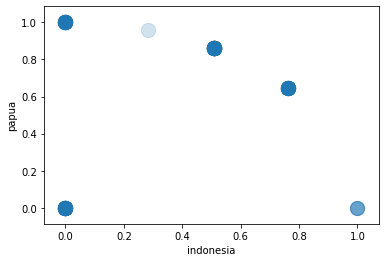

In [8]:
ax = df.plot(kind='scatter', x='indonesia', y='papua', alpha=0.2, s=200)
ax.set_xlabel("indonesia")
ax.set_ylabel("papua")

Text(0, 0.5, 'papua')

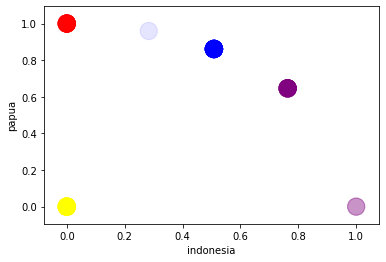

In [9]:
km = KMeans(n_clusters=4)
km.fit(matrix)
df['category'] = km.labels_

colormap = { 0: 'red', 1: 'yellow', 2: 'blue', 3: 'purple'}
colors = df.apply(lambda row: colormap[row.category], axis=1)
ax = df.plot(kind='scatter', x='indonesia', y='papua', alpha=0.1, s=300, c=colors)
ax.set_xlabel("indonesia")
ax.set_ylabel("papua")

### 8. Berikut ini menggunakan vektorizer TFIDF dan MiniBatchKmeans Sklearn untuk melakukan beberapa pengelompokan dokumen sederhana. 
<p/> Menemukan Cluster yang Optimal </p>

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


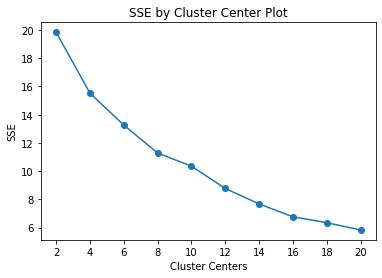

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

train = csv.reader(open("preprocessingCSV.csv", "r"))
hasil_train = []
label = []
review = []
for row in train:
    text = row[0]
    process = processing(text)
    review.append(process)

data = []
for train_text in review:
    train_text = ' '.join(train_text)
    data.append(train_text)
    
tfidf = TfidfVectorizer(use_idf=False, norm='l1')
tfidf.fit(data)
text = tfidf.transform(data)

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

### Plotting Clusters
<p/>Satu plot menggunakan PCA yang lebih baik dalam menangkap struktur global data. Yang lain menggunakan TSNE yang lebih baik dalam menangkap hubungan antar relasi</p>

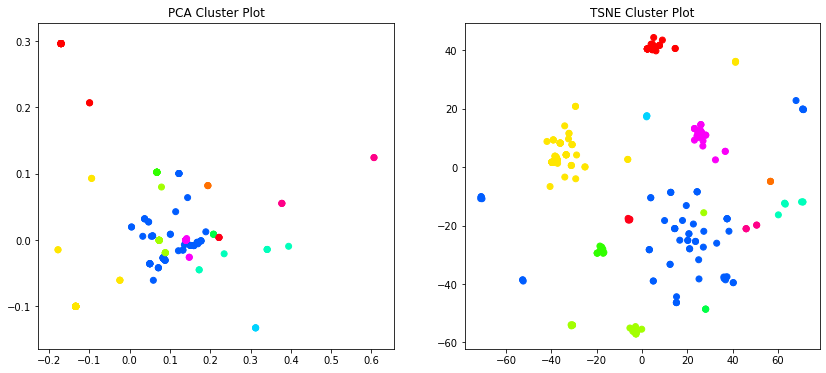

In [11]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

### Top Keywords
<p>Menghitung nilai rata-rata di semua dimensi di Panda, dikelompokkan berdasarkan label klaster. Menggunakan numpy, menemukan kata-kata teratas hanyalah menyortir nilai rata-rata untuk setiap baris, 
    dan mengambil N teratas.</p>

In [12]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
joli,banser,mi,alat,nama,maaf,indonesia,rakyat,saudara,papua

Cluster 1
joli,kabeh,kaka,kalo,kamibersamapapua,saudara,kitasemuabersaudara,kitasatuindonesia,kitabersamapapua,papuaadalahindonesia

Cluster 2
slank,tembang,saudara,sembah,buah,dr,yg,morning,indonesia,papua

Cluster 3
nyata,mas,jg,cm,kalo,sobatambyar,kitasatuindonesia,cinta,jawa,papua

Cluster 4
kamibersamapapua,kabeh,kaka,kalo,papuadibelahnkridipecah,papua,kitasatuindonesia,kitorangdengpapuabasudara,politik,indonesia

Cluster 5
jhon,joli,kabeh,kaka,rindugusdur,rasisme,out,kick,papuasaudaraku,kitasatuindonesia

Cluster 6
kaminkri,hell,heart,atuh,keren,abah,kitasemuabersaudara,kitasatuindonesia,pelukpapua,papuaadalahindonesia

Cluster 7
kapolda,joli,jg,jawa,jamin,jaga,is,jhon,youtube,pelukpapua

Cluster 8
agama,kerennn,om,kitainisama,jawa,maaf,indonesia,papua,papuasaudaraku,kitasatuindonesia

Cluster 9
joli,jhon,jg,jawa,jamin,jaga,is,indonesianextleader,youtube,asyek

Cluster 10
joli,jg,jawa,jamin,jaga,is,irjen,jho